In [278]:
import pandas as pd
import numpy as np

import math 
from scipy.stats import percentileofscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns


## Preparing the Dataset
This is mostly a copy of what is done in '''SustainableEnergyEDA.ipynb'''.
Instead of creating a separate .csv file for the modified dataset, I chose to leave the dataset unmodified and prepare it for use at "runtime". This decision is mostly because the operations used to modify the dataset are fast, and I don't want to cludder the working directory with additional files.

In [279]:
df = pd.read_csv("global-data-on-sustainable-energy.csv")

In [280]:
df["Density\\n(P/Km2)"] = df["Density\\n(P/Km2)"].str.replace(",","").astype(float)
df["Land Area(Km2)"] = df["Land Area(Km2)"].str.replace(",","").astype(float)

In [281]:
new_column_names = [
    "Country",
    "Year",
    "Electricity_Access",
    "Clean_Cooking_Fuels",
    "Renewables_Capacity_Per_Capita",
    "Financial_Flows_To_Developing_Countries",
    "Renewables_Share_Of_Consumption",
    "Electricity_From_Fossil_Fuels",
    "Electricity_From_Nuclear",
    "Electricity_From_Renewables",
    "Low-Carbon_Electricity",
    "Energy_Consumption_Per_Capita",
    "Energy_Intensity",
    "CO2_Emissions",
    "Renewables_Share_Of_Primary_Energy",
    "GDP_Growth",
    "GDP_per_Capita",
    "Density",
    "Land_Area",
    "Latitude",
    "Longitude"
]

df.columns = new_column_names

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  3649 non-null   object 
 1   Year                                     3649 non-null   int64  
 2   Electricity_Access                       3639 non-null   float64
 3   Clean_Cooking_Fuels                      3480 non-null   float64
 4   Renewables_Capacity_Per_Capita           2718 non-null   float64
 5   Financial_Flows_To_Developing_Countries  1560 non-null   float64
 6   Renewables_Share_Of_Consumption          3455 non-null   float64
 7   Electricity_From_Fossil_Fuels            3628 non-null   float64
 8   Electricity_From_Nuclear                 3523 non-null   float64
 9   Electricity_From_Renewables              3628 non-null   float64
 10  Low-Carbon_Electricity                   3607 no

In [283]:
df = df.sort_values(by=["Country","Year"])

df["CO2_Emissions_Growth"] = df.groupby("Country")["CO2_Emissions"].pct_change() * 100
df["Renewables_SOC_Growth"] = df.groupby("Country")["Renewables_Share_Of_Consumption"].pct_change() * 100
df["Nuclear_Growth"] = df.groupby("Country")["Electricity_From_Nuclear"].pct_change() * 100
df["Fossil_Fuels_Growth"] = df.groupby("Country")["Electricity_From_Fossil_Fuels"].pct_change() * 100
df["Renewables_Growth"] = df.groupby("Country")["Electricity_From_Renewables"].pct_change() * 100
df["Electricity_Access_Growth"] = df.groupby("Country")["Electricity_Access"].pct_change() * 100
df["Clean_Cooking_Fuels_Growth"] = df.groupby("Country")["Clean_Cooking_Fuels"].pct_change() * 100

df.head(40)


,Country,Year,Electricity_Access,Clean_Cooking_Fuels,Renewables_Capacity_Per_Capita,Financial_Flows_To_Developing_Countries,Renewables_Share_Of_Consumption,Electricity_From_Fossil_Fuels,Electricity_From_Nuclear,Electricity_From_Renewables,...,Land_Area,Latitude,Longitude,CO2_Emissions_Growth,Renewables_SOC_Growth,Nuclear_Growth,Fossil_Fuels_Growth,Renewables_Growth,Electricity_Access_Growth,Clean_Cooking_Fuels_Growth
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,652230.0,33.939110,67.709953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,652230.0,33.939110,67.709953,-3.947368,1.355857,NaN,-43.750000,61.290323,152.515910,16.129032
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,652230.0,33.939110,67.709953,41.095886,-17.039474,NaN,44.444444,12.000000,130.923724,13.888889
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,652230.0,33.939110,67.709953,18.446608,-3.092784,NaN,138.461538,12.500000,56.640010,15.853659
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,652230.0,33.939110,67.709953,-15.573775,20.676487,NaN,6.451613,-11.111111,36.139769,14.736842
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,652230.0,33.939110,67.709953,50.485436,-23.417722,NaN,3.030303,5.357143,26.543406,11.926606
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,652230.0,33.939110,67.709953,13.548390,-5.873672,NaN,-41.176471,8.474576,20.983097,13.524590
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,652230.0,33.939110,67.709953,0.568181,-9.752273,NaN,0.000000,17.187500,17.358553,10.469314
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,652230.0,33.939110,67.709953,101.129942,-26.441974,NaN,-5.000000,-28.000000,17.611129,9.150327
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,652230.0,33.939110,67.709953,37.078657,-21.917808,NaN,-15.789474,44.444444,10.235967,10.179641


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  3649 non-null   object 
 1   Year                                     3649 non-null   int64  
 2   Electricity_Access                       3639 non-null   float64
 3   Clean_Cooking_Fuels                      3480 non-null   float64
 4   Renewables_Capacity_Per_Capita           2718 non-null   float64
 5   Financial_Flows_To_Developing_Countries  1560 non-null   float64
 6   Renewables_Share_Of_Consumption          3455 non-null   float64
 7   Electricity_From_Fossil_Fuels            3628 non-null   float64
 8   Electricity_From_Nuclear                 3523 non-null   float64
 9   Electricity_From_Renewables              3628 non-null   float64
 10  Low-Carbon_Electricity                   3607 no

## Getting trends over time by country, and removing unnecessary columns


In [285]:
df_subset = df[["Country", "Year", "GDP_Growth", "CO2_Emissions_Growth", "Renewables_SOC_Growth", "Nuclear_Growth", "Fossil_Fuels_Growth", "Renewables_Growth", "Electricity_Access_Growth", "Clean_Cooking_Fuels_Growth"]]

In [286]:
df_subset = df_subset.fillna(0)
df_subset = df_subset.replace([np.inf, -np.inf], 0)

In [287]:
df_mean = df_subset.groupby(by="Country").mean().reset_index()
df_mean = df_mean.drop(columns=["Country", "Year"])

df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GDP_Growth                  176 non-null    float64
 1   CO2_Emissions_Growth        176 non-null    float64
 2   Renewables_SOC_Growth       176 non-null    float64
 3   Nuclear_Growth              176 non-null    float64
 4   Fossil_Fuels_Growth         176 non-null    float64
 5   Renewables_Growth           176 non-null    float64
 6   Electricity_Access_Growth   176 non-null    float64
 7   Clean_Cooking_Fuels_Growth  176 non-null    float64
dtypes: float64(8)
memory usage: 11.1 KB


### For Multiple Linear-Regression, there should be no influential outliers
However, in this case, the outliers are an important feature of the data. This makes linear regression a poor model choice for this dataset. I wanted to try applying linear regression anyways to see how it performs, and if insights can still be gathered from it.

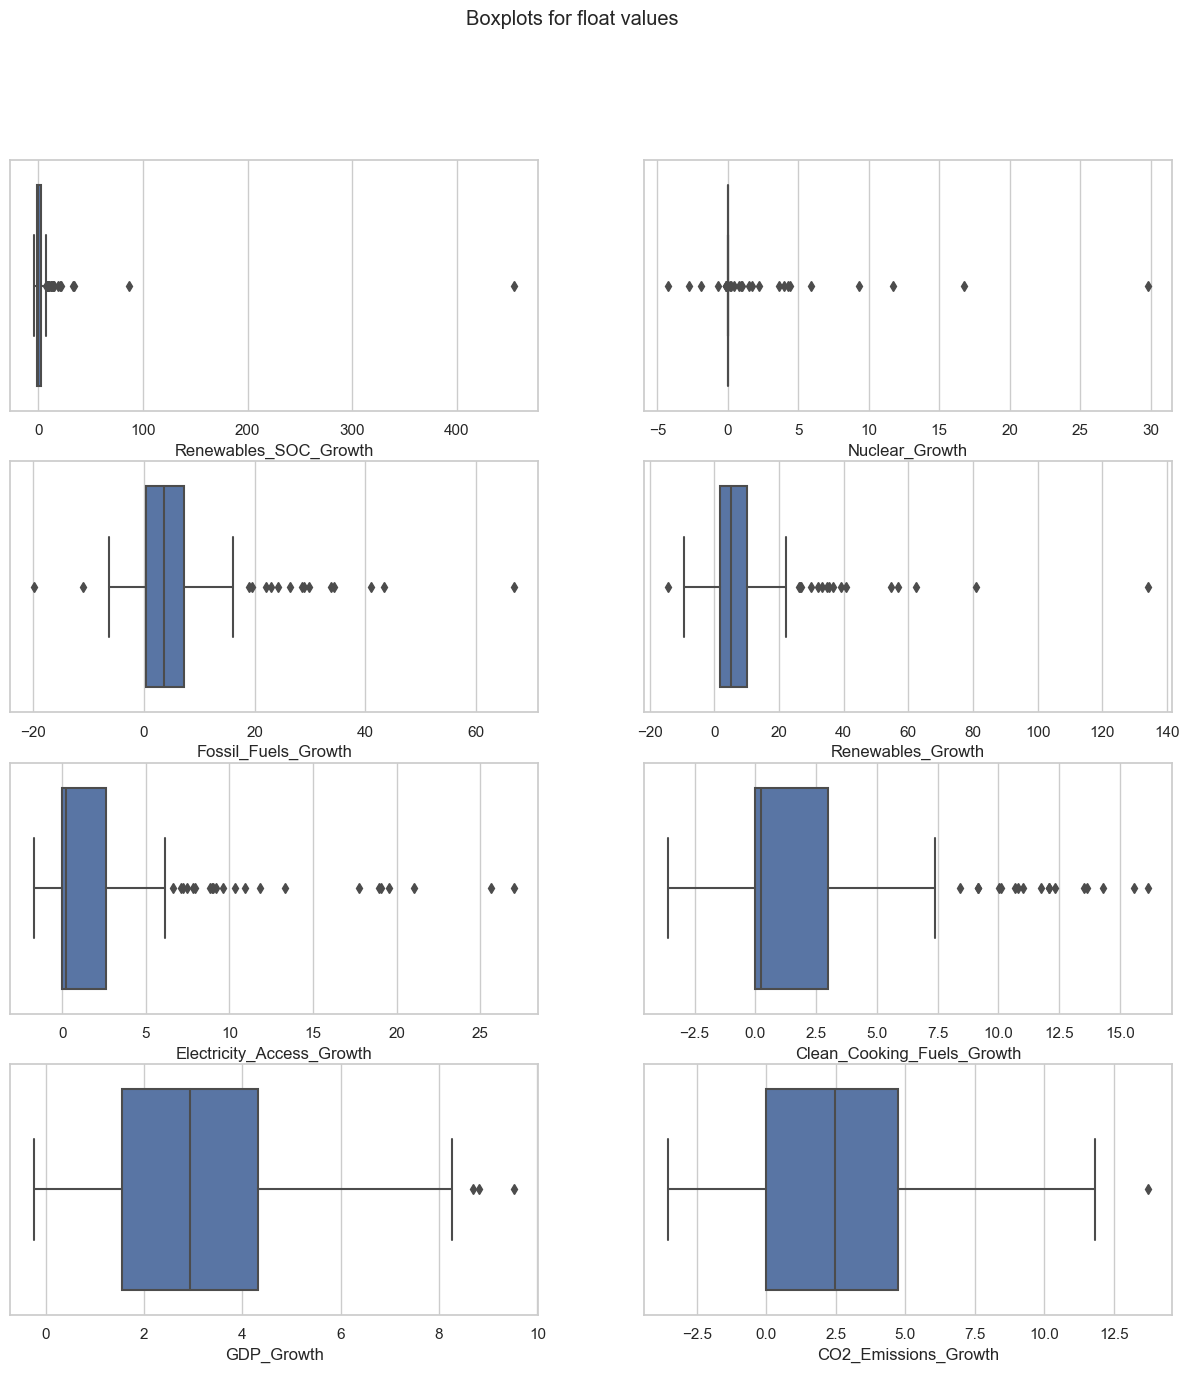

In [288]:
num_columns = df_mean.shape[1]
fig, axes = plt.subplots(math.ceil((num_columns)/2),2, figsize=(15,15))
fig.suptitle("Boxplots for float values")

i = 0
while i < num_columns:
    sns.boxplot(ax=axes[(i - 2) // 2, (i - 2) % 2], x=df_mean[list(df_mean.columns)[i]])
    i = i + 1
    
plt.show()

Like with the unmodified dataset, there are a lots of outliers, and they differ from the mean by a significant margin.

Since the outliers are a feature of the data, and not caused by errors, removing or clamping them is not ideal. However, I want to see how clamping out the outliers will impact the model, so I experiment with that below.

In [289]:
def outlier_clamper(df, factor = 1.5):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (factor * iqr)
        lower_threshold = q1 - (factor * iqr)
        upper_mask = df[col] > upper_threshold
        lower_mask = df[col] < lower_threshold
        df.loc[upper_mask, col] = upper_threshold
        df.loc[lower_mask, col] = lower_threshold

In [290]:
df_outlier_clamped = df_mean.copy()
outlier_clamper(df_outlier_clamped, 1.5)

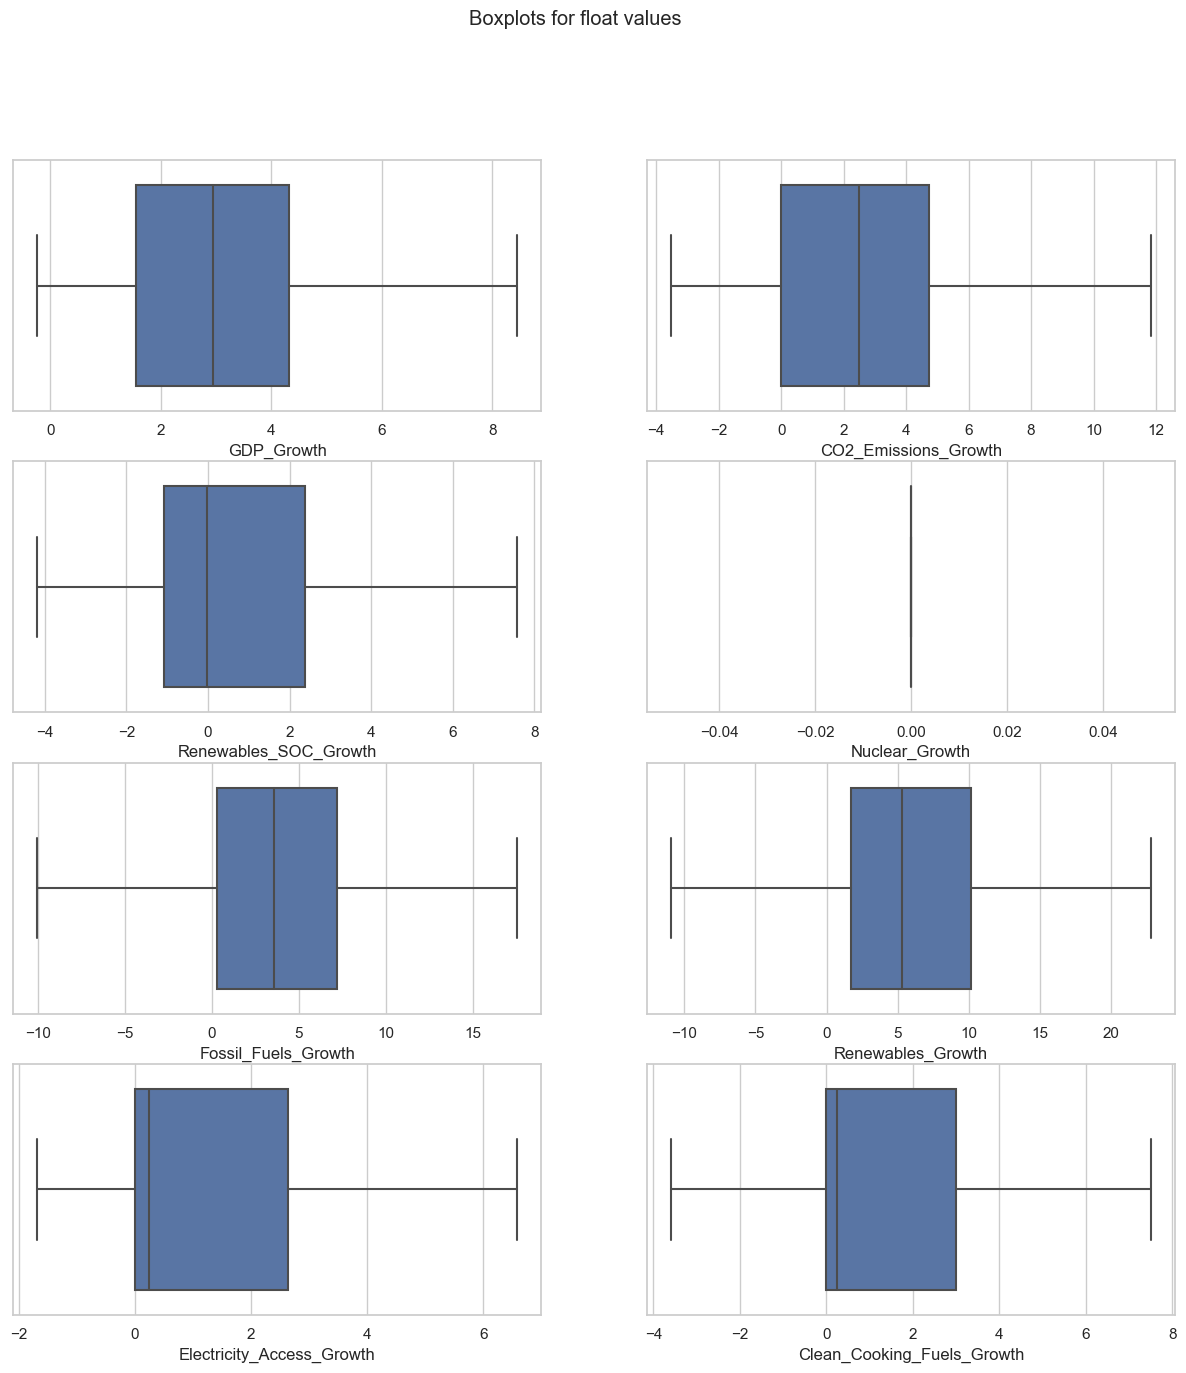

In [291]:
num_columns = df_outlier_clamped.shape[1]
fig, axes = plt.subplots(math.ceil((num_columns)/2),2, figsize=(15,15))
fig.suptitle("Boxplots for float values")

i = 0
while i < num_columns:
    sns.boxplot(ax=axes[(i) // 2, (i) % 2], x=df_outlier_clamped[list(df_outlier_clamped.columns)[i]])
    i = i + 1
    
plt.show()

## No Multi-Collinearity
Multiple Linear-Regression has a no multi-collinearity assumption, no two independent variables can be strongly linearly correlated. It can still be used to build an accurate predictor, but it may generate fewer insights.

/Users/nolan/PycharmProjects/SustainableEnergy/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


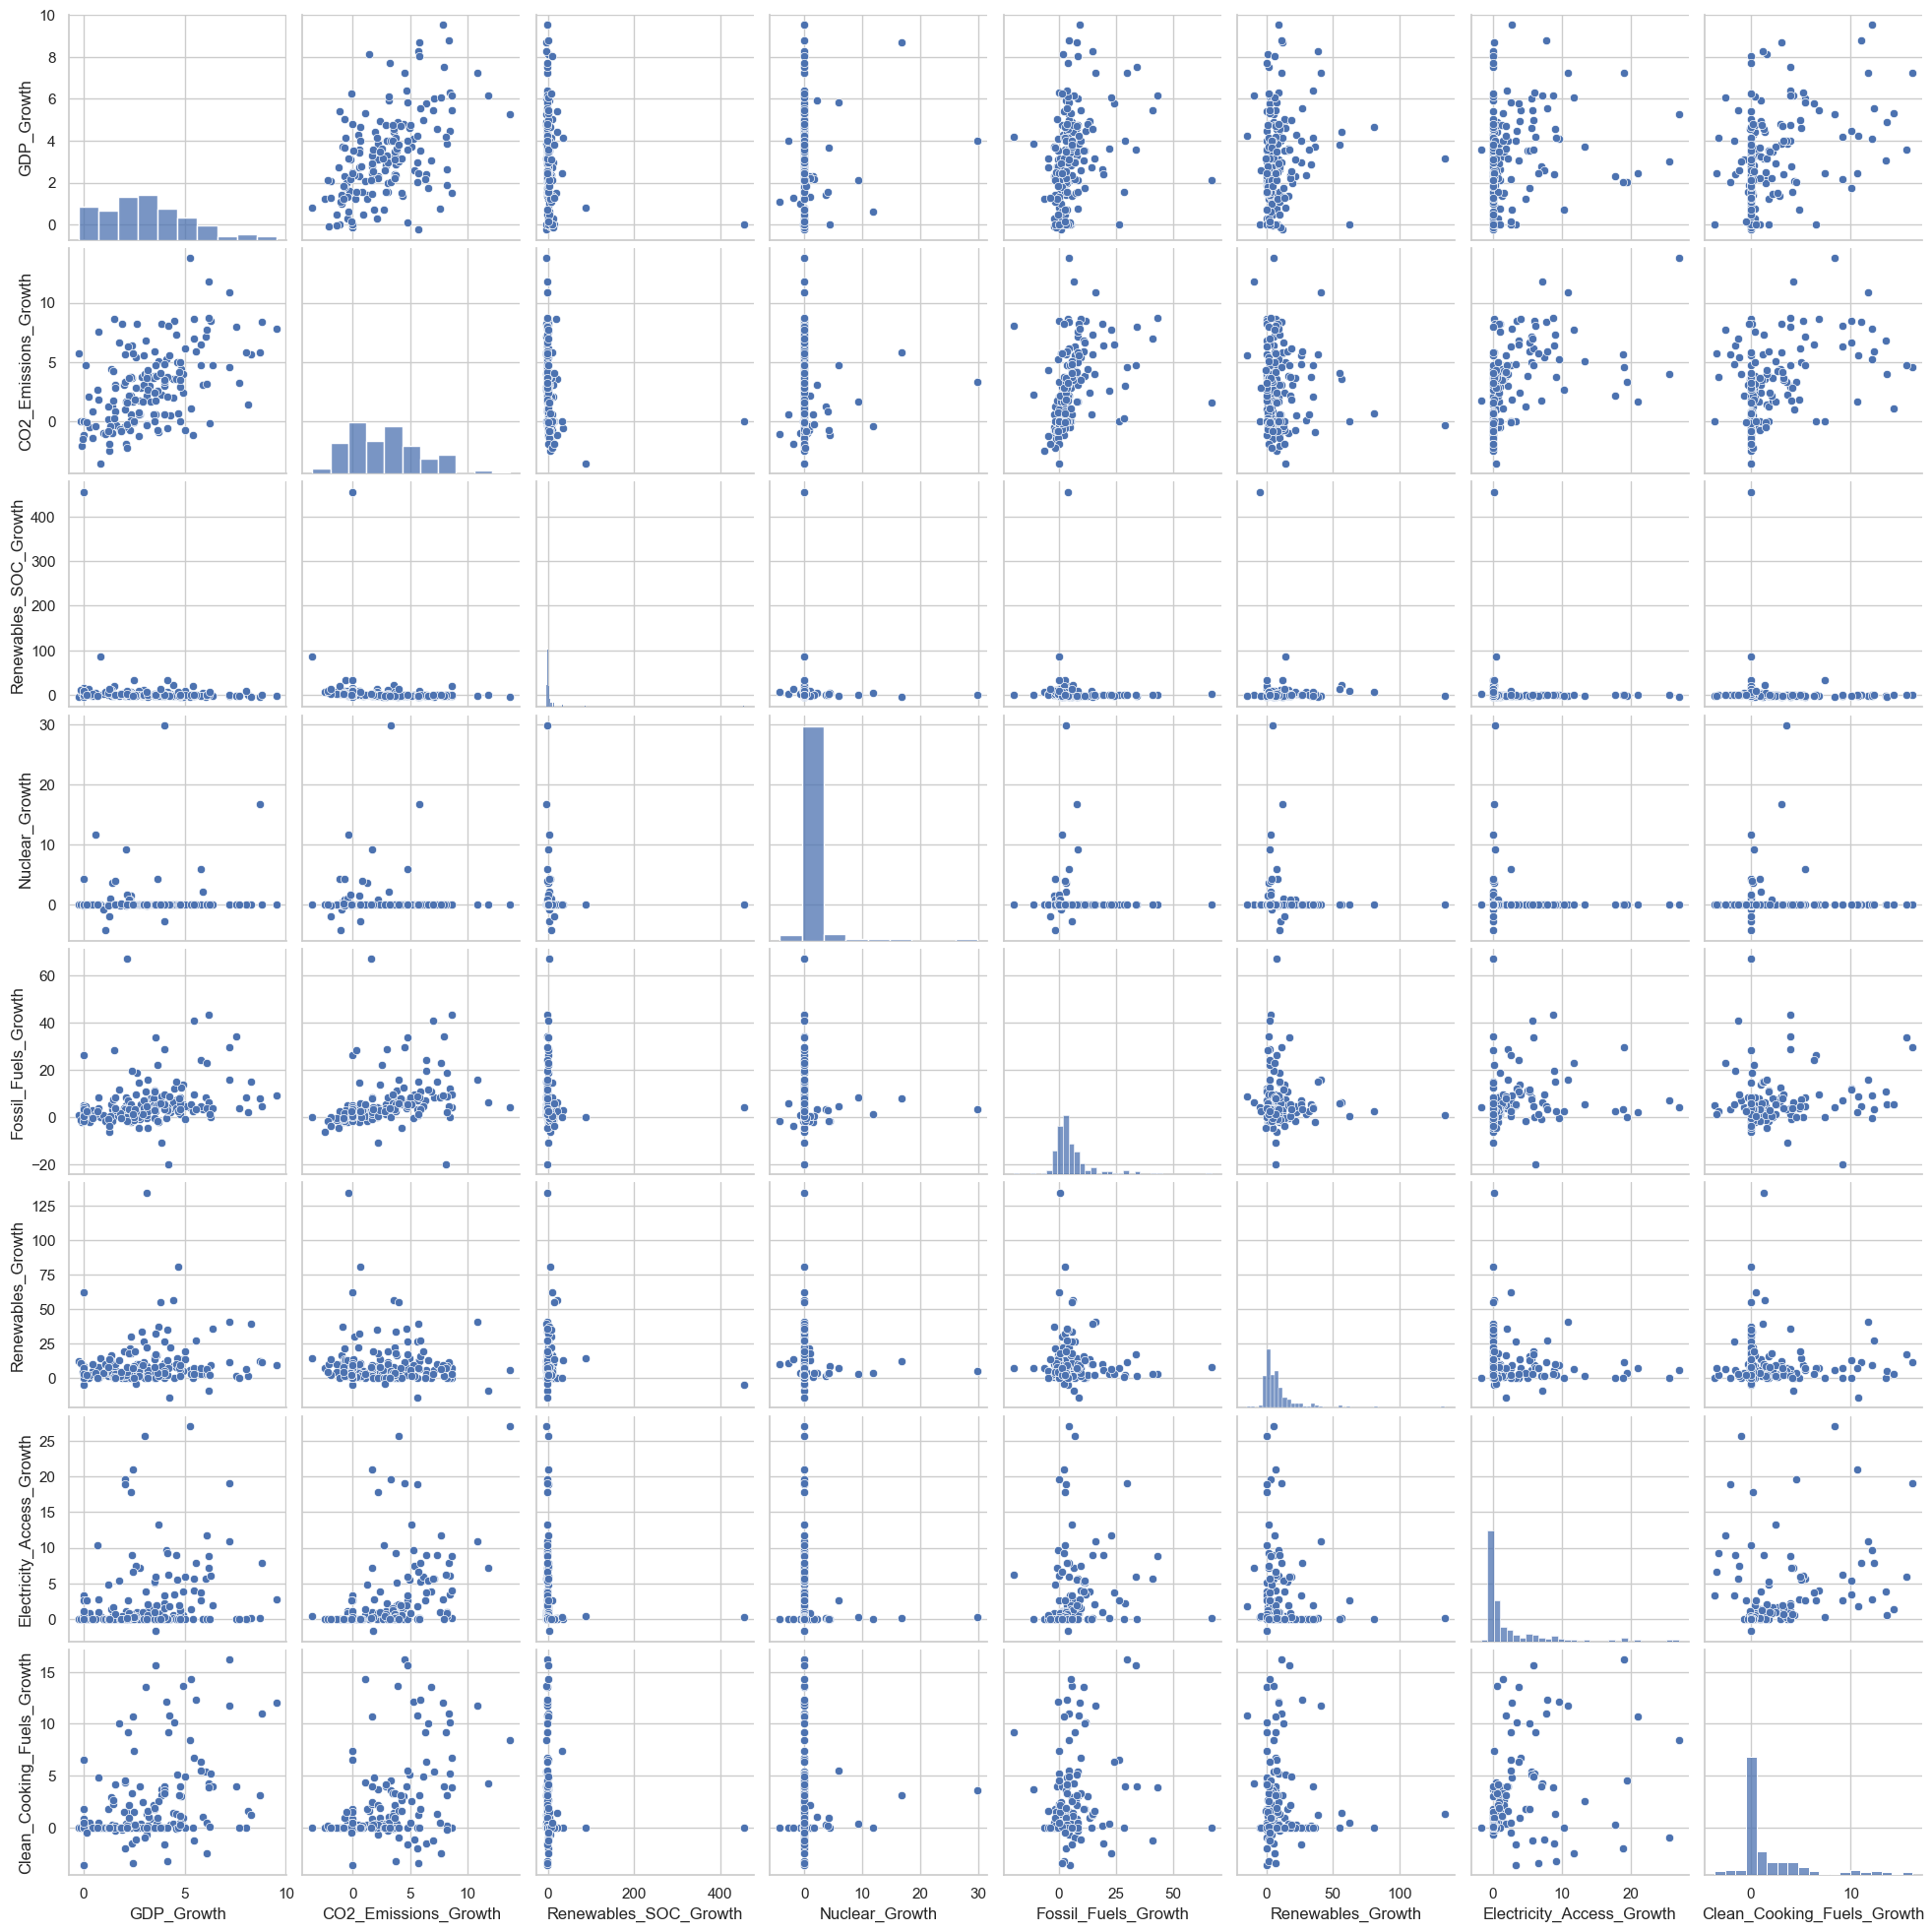

In [292]:
sns.pairplot(df_mean)

/Users/nolan/PycharmProjects/SustainableEnergy/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


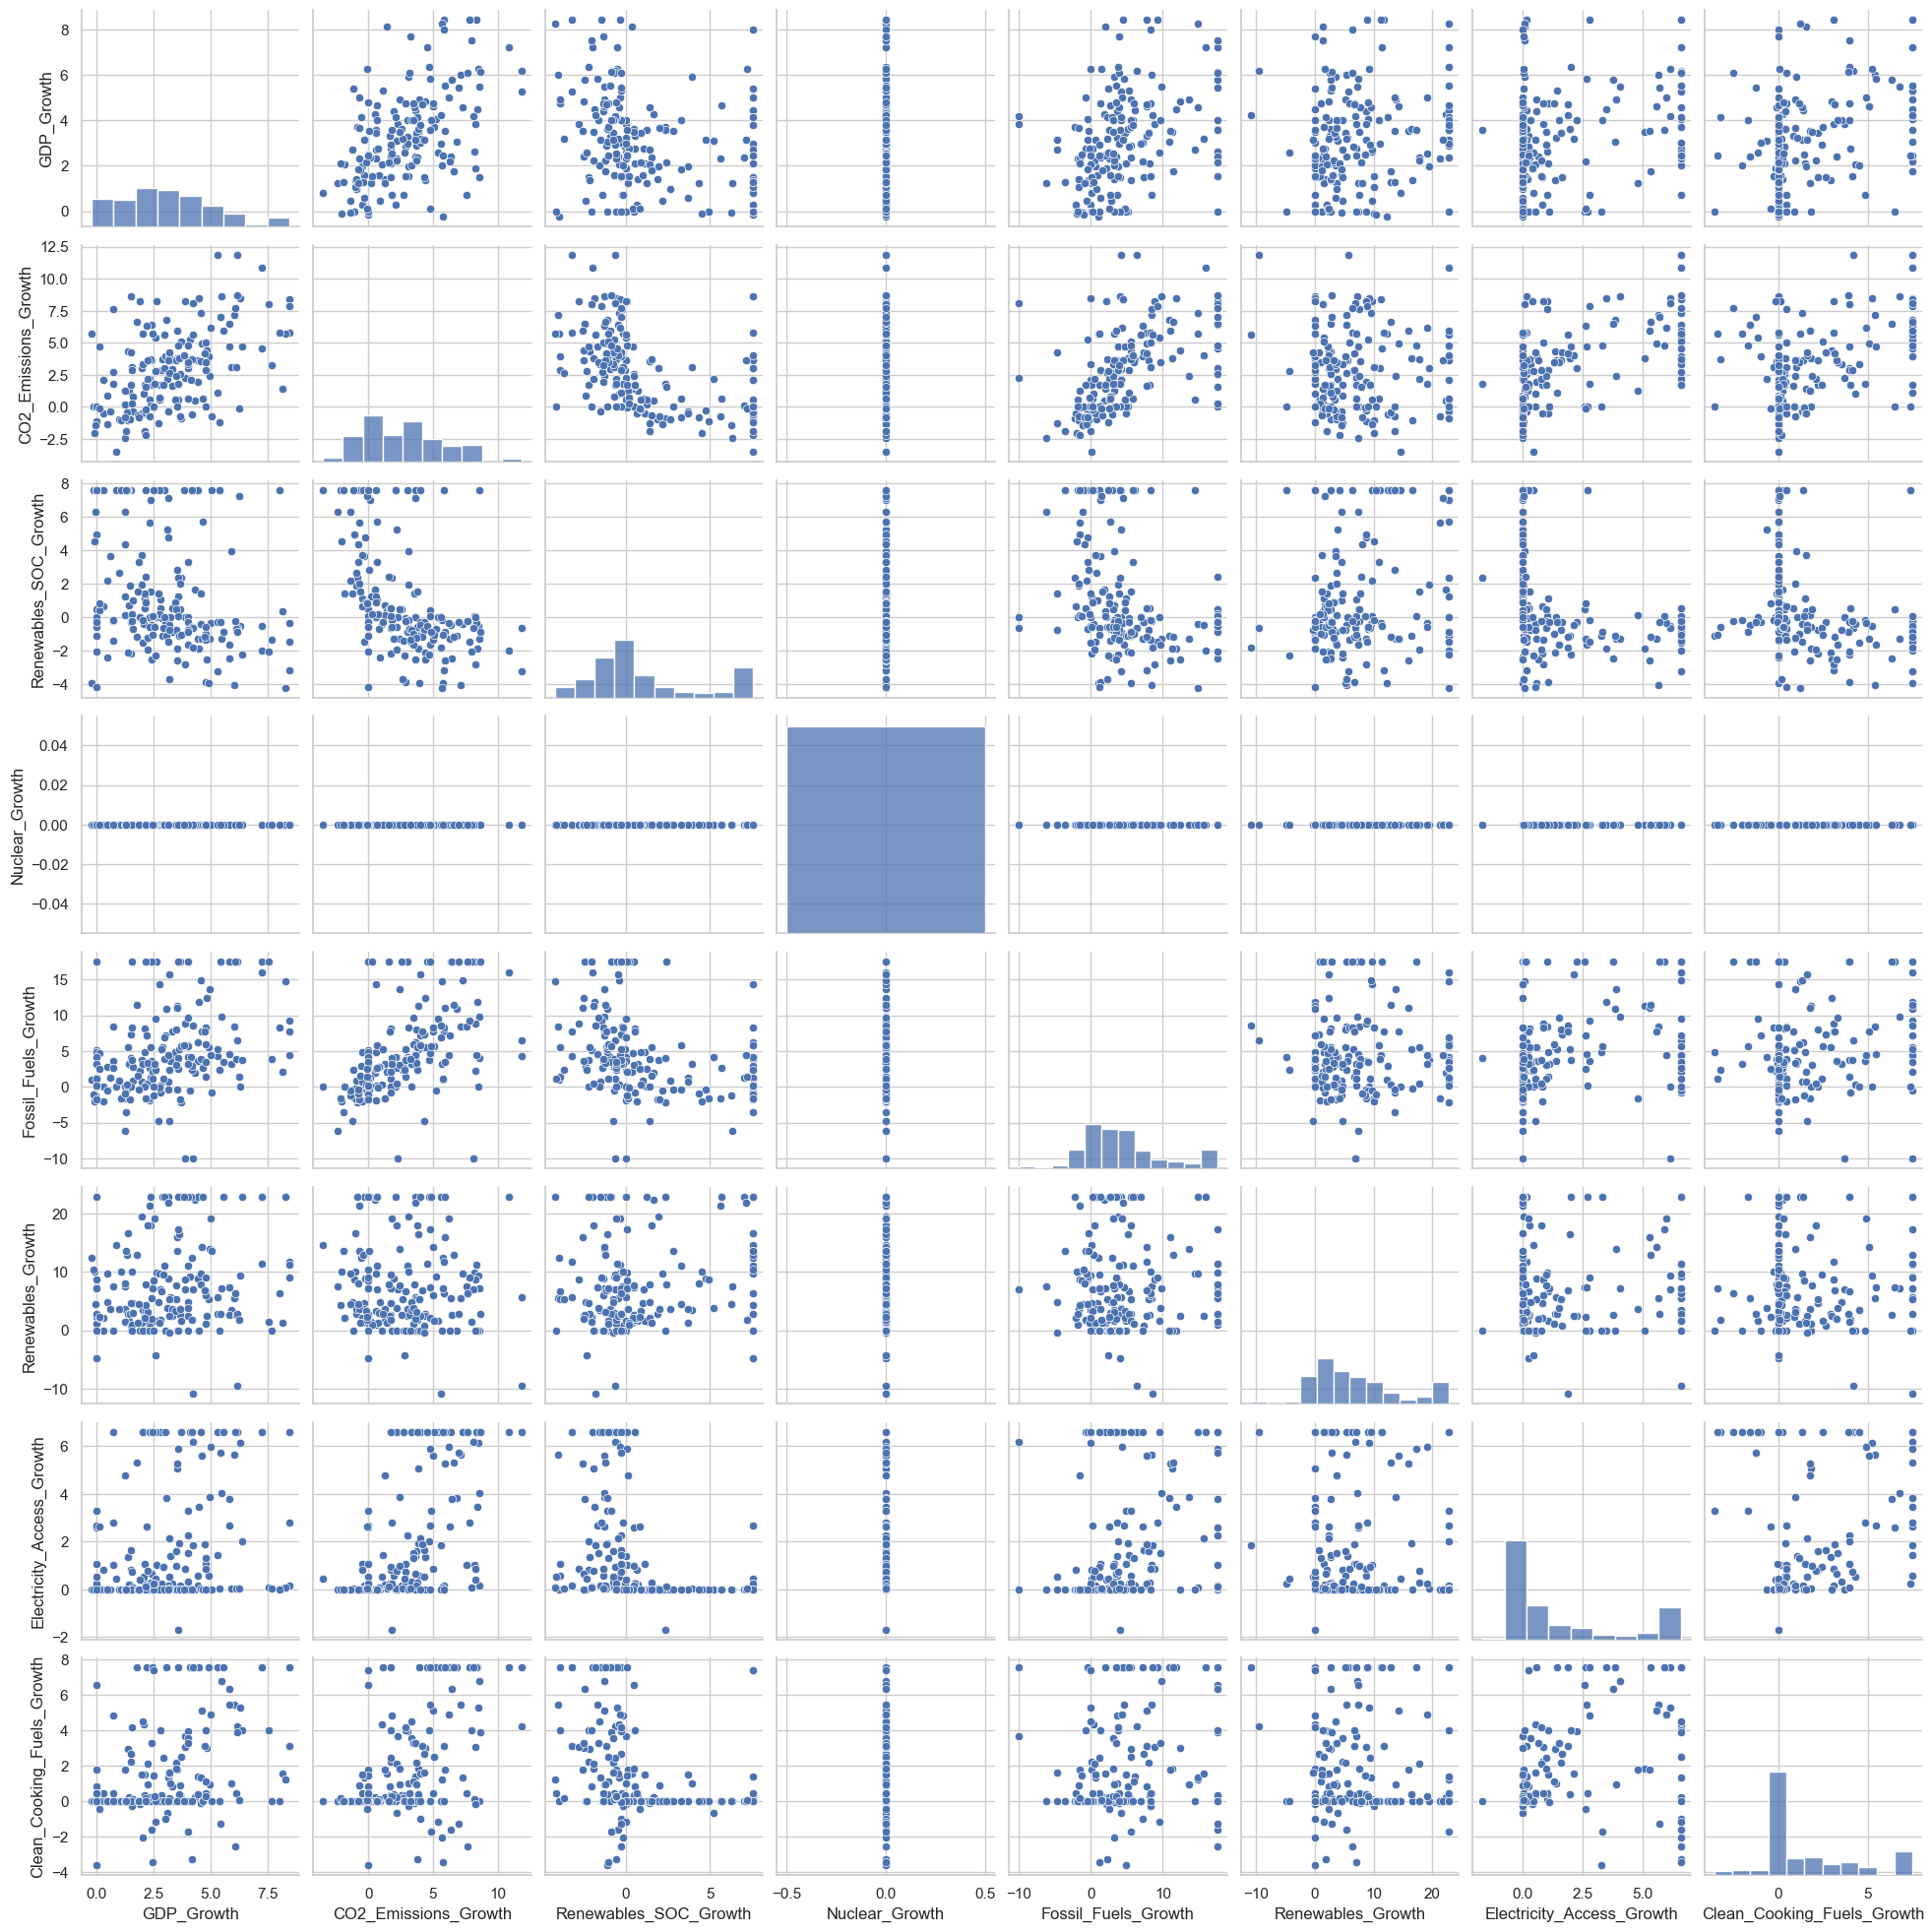

In [293]:
sns.pairplot(df_outlier_clamped)

This isn't ideal. The data columns have a weak linear relationship with the dependent variable "CO2_Emissions_Growth", and have a slight linear relationship with each other.

I have to use the mean over the years per country or else it would not satisfy the independence of observations model assumptions. However, by doing this, there are very few rows of data to use. 


### Building a Linear-Regression Model
I want to compare how well a Linear Regression model can be built after performing a variety of different operations on the data columns. This function returns the results (various measurements of how well the machine learning model performs), the comparisons between the predicted values and the actual values, and the coefficients that the model uses per data column.

In [294]:
def get_results(frame, name):
    X = frame.drop(columns=["CO2_Emissions_Growth", "Nuclear_Growth"])
    y = frame[["CO2_Emissions_Growth"]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=404)

    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    
    y_pred_train = mlr.predict(X_train)
    y_pred_test = mlr.predict(X_test)
    
    comparison = pd.DataFrame(data={"actual": y_test["CO2_Emissions_Growth"],
                             'predicted': y_pred_test.ravel()})
    comparison["residual"] = comparison["actual"] - comparison["predicted"]
    comparison_training = y_train["CO2_Emissions_Growth"] - y_pred_train.ravel()

    results = pd.DataFrame([{"Name": name,  
                             "Training-Set": 1,
                            "Coef-determination": mlr.score(X_train, y_train),
                           "R^2": r2_score(y_train, y_pred_train),
                            "MAE":  mean_absolute_error(y_train,y_pred_train),
                            "MSE": mean_squared_error(y_train, y_pred_train),
                            "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
                             "Residual_Mean": comparison_training.mean()
                            },
                            {"Name": name,
                             "Training-Set": 0,
                            "Coef-determination": mlr.score(X_test, y_test),
                           "R^2": r2_score(y_test, y_pred_test),
                            "MAE":  mean_absolute_error(y_test,y_pred_test),
                            "MSE": mean_squared_error(y_test, y_pred_test),
                            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
                             "Residual_Mean": comparison["residual"].mean()
                            }
                            
                            ])                       

    coefficients = pd.DataFrame(mlr.coef_, columns=X.columns)
    
    return results, comparison, coefficients
    

In [295]:
score1, comparisons1, coefficients = get_results(df_mean, "Aggregated by Country")
score1

,Name,Training-Set,Coef-determination,R^2,MAE,MSE,RMSE,Residual_Mean
0,Aggregated by Country,1,0.536780,0.536780,1.640851,4.724356,2.173558,5.075305e-17
1,Aggregated by Country,0,0.057301,0.057301,1.906958,7.515067,2.741362,-5.145722e-01


This model performs terribly, especially on the training set. This makes sense considering the small sample size and number of outliers.
What if the outliers were clamped at various different clamping factors?

In [296]:
scores = {}
comparisons = {}

score_df = pd.DataFrame()

for i in range(1,20):
    df_chopped = df_mean.copy()
    outlier_clamper(df_chopped, i/20)
    scores[i], comparisons[i], coefficients = get_results(df_chopped, "Chopped at factor x" + str(i/20))
    score_df = pd.concat([score_df, scores[i]], ignore_index=True)
    

for i in range(2,20):
    df_chopped = df_mean.copy()
    outlier_clamper(df_chopped, i/2)
    scores[i+20], comparisons[i+20],coefficients = get_results(df_chopped, "Chopped at factor x" + str(i/2))
    score_df = pd.concat([score_df, scores[i+20]], ignore_index=True)
        

score_df

,Name,Training-Set,Coef-determination,R^2,MAE,MSE,RMSE,Residual_Mean
0,Chopped at factor x0.05,1,0.644762,0.644762,0.905536,1.547682,1.244059,4.060244e-16
1,Chopped at factor x0.05,0,0.615641,0.615641,0.872948,1.480430,1.216729,-1.013331e-01
2,Chopped at factor x0.1,1,0.649983,0.649983,0.959440,1.704835,1.305693,-4.789819e-16
3,Chopped at factor x0.1,0,0.614790,0.614790,0.914097,1.632574,1.277722,-1.117258e-01
4,Chopped at factor x0.15,1,0.655095,0.655095,1.007766,1.853233,1.361335,4.662937e-16
...,...,...,...,...,...,...,...,...
69,Chopped at factor x8.5,0,0.062202,0.062202,1.851254,7.475998,2.734227,-4.257657e-01
70,Chopped at factor x9.0,1,0.567206,0.567206,1.596664,4.414044,2.100963,-7.612958e-17
71,Chopped at factor x9.0,0,0.070911,0.070911,1.851502,7.406573,2.721502,-4.283551e-01
72,Chopped at factor x9.5,1,0.567589,0.567589,1.594897,4.410136,2.100032,-2.283887e-16


It appears that using a smaller factor for clamping outliers produces better results with less overfitting. This makes sense as linear regression performs better without outliers. However, this also makes the resulting model rather useless, as it won't be able to handle unseen values, and the insights gathered from it will only be influenced by the data surrounding the mean of the data.

Additionally, the outliers are a key feature of the dataset, it would be counterproductive to completely clamp them out of existence. This would be more helpful if the outliers were made in error, rather than being a feature of the data.

I read an article by Davin Cermak on [medium.com](https://medium.com/mlearning-ai/three-simple-methods-for-dealing-with-outliers-in-regression-analysis-8003ca56734c#:~:text=The%20linear%20regression%20results%20from,the%20model%20without%20the%20outlier.) that describes a method of handling outliers in a linear regression model without clamping or removing the outliers. The idea is to detect the outliers and then add a dummy variable that indicates if it is an outlier or not.

Keeping all the sample data is ideal in this situation as the sample is very limited. I think in this case, however, this method violates the independent observations model assumption.

In [297]:
def generate_outlier_dummies(df, factor = 1.5):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (factor * iqr)
        lower_threshold = q1 - (factor * iqr)
        upper_mask = df[col] > upper_threshold
        lower_mask = df[col] < lower_threshold
        df["is_" + col + "_outlier"] = (upper_mask | lower_mask)
        df["is_" + col +"_outlier"] = df["is_" + col +"_outlier"].astype(int)

df_dummified = df_mean.copy()
generate_outlier_dummies(df_dummified, 0.2)
df_dummified = df_dummified.drop(columns=["is_CO2_Emissions_Growth_outlier", "is_Nuclear_Growth_outlier"])

df_dummified.head()

,GDP_Growth,CO2_Emissions_Growth,Renewables_SOC_Growth,Nuclear_Growth,Fossil_Fuels_Growth,Renewables_Growth,Electricity_Access_Growth,Clean_Cooking_Fuels_Growth,is_GDP_Growth_outlier,is_Renewables_SOC_Growth_outlier,is_Fossil_Fuels_Growth_outlier,is_Renewables_Growth_outlier,is_Electricity_Access_Growth_outlier,is_Clean_Cooking_Fuels_Growth_outlier
0,5.283337,13.740641,-3.216049,0.0,4.254023,5.721456,27.039663,8.413600,1,1,0,0,1,1
1,3.859305,2.225649,0.000000,0.0,-11.017646,6.977584,0.000010,3.684674,0,0,1,0,0,1
2,2.885714,3.731304,-1.117477,0.0,5.530320,33.307004,0.039996,0.125984,0,0,0,1,0,0
3,4.945895,2.409118,-1.251518,0.0,13.687411,13.837062,3.879991,0.958525,1,0,1,1,1,0
4,1.515946,8.614905,19.038171,0.0,4.007322,0.000000,0.150761,0.000000,0,1,0,1,0,0


In [298]:
score2, comparrisons2, coefficients2 = get_results(df_dummified, "Outliers as Dummies")
score2

,Name,Training-Set,Coef-determination,R^2,MAE,MSE,RMSE,Residual_Mean
0,Outliers as Dummies,1,0.553868,0.553868,1.628169,4.550073,2.133090,-4.060244e-16
1,Outliers as Dummies,0,0.211504,0.211504,1.737421,6.285786,2.507147,-4.198670e-01


This does produce better results than without handling outliers, but not by much. The results are worse than clamping the outliers using a factor of 0.2.

What if there are multiple dummy variables for various iqr-factors?

In [299]:
def generate_outlier_multi_dummies(df, factors=None):
    if factors is None:
        factors = [1.5]
    for col in df.columns:
        if (col == "Nuclear_Growth") or (col == "CO2_Emissions_Growth"):
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        for factor in factors:
            upper_threshold = q3 + (factor * iqr)
            lower_threshold = q1 - (factor * iqr)
            upper_mask = df[col] > upper_threshold
            lower_mask = df[col] < lower_threshold
            df["is_" + col + "_outlier_" + str(factor)] = (upper_mask | lower_mask)
            df["is_" + col +"_outlier_" + str(factor)] = df["is_" + col +"_outlier_" + str(factor)].astype(int)

df_dummified2 = df_mean.copy()

generate_outlier_multi_dummies(df_dummified2, [i/10 for i in range(2, 80, 20)])

df_dummified2.head()

,GDP_Growth,CO2_Emissions_Growth,Renewables_SOC_Growth,Nuclear_Growth,Fossil_Fuels_Growth,Renewables_Growth,Electricity_Access_Growth,Clean_Cooking_Fuels_Growth,is_GDP_Growth_outlier_0.2,is_GDP_Growth_outlier_2.2,...,is_Renewables_Growth_outlier_4.2,is_Renewables_Growth_outlier_6.2,is_Electricity_Access_Growth_outlier_0.2,is_Electricity_Access_Growth_outlier_2.2,is_Electricity_Access_Growth_outlier_4.2,is_Electricity_Access_Growth_outlier_6.2,is_Clean_Cooking_Fuels_Growth_outlier_0.2,is_Clean_Cooking_Fuels_Growth_outlier_2.2,is_Clean_Cooking_Fuels_Growth_outlier_4.2,is_Clean_Cooking_Fuels_Growth_outlier_6.2
0,5.283337,13.740641,-3.216049,0.0,4.254023,5.721456,27.039663,8.413600,1,0,...,0,0,1,1,1,1,1,0,0,0
1,3.859305,2.225649,0.000000,0.0,-11.017646,6.977584,0.000010,3.684674,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.885714,3.731304,-1.117477,0.0,5.530320,33.307004,0.039996,0.125984,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.945895,2.409118,-1.251518,0.0,13.687411,13.837062,3.879991,0.958525,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1.515946,8.614905,19.038171,0.0,4.007322,0.000000,0.150761,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
score3, comparisons3, coefficients3 = get_results(df_dummified2, "Outliers as Multiple Dummies")
score3

,Name,Training-Set,Coef-determination,R^2,MAE,MSE,RMSE,Residual_Mean
0,Outliers as Multiple Dummies,1,0.636176,0.636176,1.390955,3.710626,1.926298,5.075305e-16
1,Outliers as Multiple Dummies,0,0.518298,0.518298,1.533593,3.840063,1.959608,-2.933459e-01


This produces a much better result than before, with significantly less overfitting. The mean of the residuals is also closer to 0. 

However, now there are numerous dummy variables that practically all measure the same thing: the degree to which the value deviates from the mean. So what if we just encoded that as an additional variable instead?

In [301]:
def generate_outlier_zscore(df):
    for col in df.columns:
        if (col == "Nuclear_Growth") or (col == "CO2_Emissions_Growth"):
            continue
        z_score = (df[col] - df[col].mean())/ df[col].std()

        df[col + "_z_score"] = z_score
        
def generate_outlier_percentiles(df):
    for col in df.columns:
        if (col == "Nuclear_Growth") or (col == "CO2_Emissions_Growth"):
            continue
        percentile = [percentileofscore(df[col], value) for value in df[col]]
        df[col + "_percentile"] = percentile
        
def generate_outlier_iqr_factor(df):
   for col in df.columns:
    if (col == "Nuclear_Growth") or (col == "CO2_Emissions_Growth"):
        continue
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_factor = (df[col] - q3) / iqr
    lower_factor = (q1 - df[col]) / iqr
    df[col + "_upper_factor"] = upper_factor
    df[col + "_lower_factor"] = lower_factor
       
    
        

In [302]:
df_zScored = df_mean.copy()
generate_outlier_zscore(df_zScored)
df_percentiled = df_mean.copy()
generate_outlier_percentiles(df_percentiled)
df_iqr_factored = df_mean.copy()
generate_outlier_iqr_factor(df_iqr_factored)

In [303]:
score4, comparisons4, coefficients4 = get_results(df_zScored, "Z-scores Given")
score5, comparisons5, coefficients5 = get_results(df_percentiled, "Percentiles Given")
score6, comparisons6, coefficients6 = get_results(df_iqr_factored, "IQR-Factor Given")

df_concated = pd.concat([score1, score2, score3,score4,score5, score6], ignore_index=True)
df_concated

,Name,Training-Set,Coef-determination,R^2,MAE,MSE,RMSE,Residual_Mean
0,Aggregated by Country,1,0.536780,0.536780,1.640851,4.724356,2.173558,5.075305e-17
1,Aggregated by Country,0,0.057301,0.057301,1.906958,7.515067,2.741362,-5.145722e-01
2,Outliers as Dummies,1,0.553868,0.553868,1.628169,4.550073,2.133090,-4.060244e-16
3,Outliers as Dummies,0,0.211504,0.211504,1.737421,6.285786,2.507147,-4.198670e-01
4,Outliers as Multiple Dummies,1,0.636176,0.636176,1.390955,3.710626,1.926298,5.075305e-16
5,Outliers as Multiple Dummies,0,0.518298,0.518298,1.533593,3.840063,1.959608,-2.933459e-01
6,Z-scores Given,1,0.536780,0.536780,1.640851,4.724356,2.173558,2.537653e-16
7,Z-scores Given,0,0.057301,0.057301,1.906958,7.515067,2.741362,-5.145722e-01
8,Percentiles Given,1,0.676226,0.676226,1.301235,3.302156,1.817184,5.107026e-16
9,Percentiles Given,0,0.395929,0.395929,1.371499,4.815575,2.194442,-2.309508e-01


The best-performing models are those in which various dummy variables represent how far the data lies outside the IQR ('Outliers as Multiple Dummies'), and those in which each value is accompanied by the percentile it falls on ('Percentiles Given').

In [304]:
coefficients5.sort_values(by=0,axis=1, ascending=False)

,GDP_Growth,Electricity_Access_Growth,Clean_Cooking_Fuels_Growth,Fossil_Fuels_Growth_percentile,Electricity_Access_Growth_percentile,Renewables_Growth_percentile,Renewables_SOC_Growth,GDP_Growth_percentile,Clean_Cooking_Fuels_Growth_percentile,Renewables_Growth,Renewables_SOC_Growth_percentile,Fossil_Fuels_Growth
0,0.418888,0.158694,0.155525,0.046806,0.015587,0.009057,-0.002501,-0.005386,-0.014334,-0.01436,-0.019845,-0.047931


In [305]:
coefficients3.sort_values(by=0,axis=1, ascending=False) 

,is_Renewables_Growth_outlier_0.2,is_Clean_Cooking_Fuels_Growth_outlier_0.2,Electricity_Access_Growth,GDP_Growth,is_Renewables_Growth_outlier_4.2,Clean_Cooking_Fuels_Growth,is_Renewables_SOC_Growth_outlier_0.2,is_Renewables_SOC_Growth_outlier_4.2,Fossil_Fuels_Growth,is_Fossil_Fuels_Growth_outlier_4.2,...,is_GDP_Growth_outlier_0.2,is_Fossil_Fuels_Growth_outlier_0.2,is_Electricity_Access_Growth_outlier_6.2,is_Electricity_Access_Growth_outlier_2.2,is_Renewables_Growth_outlier_6.2,is_Clean_Cooking_Fuels_Growth_outlier_2.2,is_Fossil_Fuels_Growth_outlier_2.2,is_Renewables_SOC_Growth_outlier_6.2,is_Electricity_Access_Growth_outlier_4.2,is_Fossil_Fuels_Growth_outlier_6.2
0,0.543712,0.509957,0.469776,0.41442,0.354438,0.284555,0.204822,0.157236,0.135854,0.117214,...,-0.293741,-0.337971,-1.225934,-1.541658,-1.602444,-2.866365,-2.912339,-4.110061,-4.624868,-5.106887


For both models, GDP_Growth is an important feature. For some of the outlier dummy variables, they are so unimportant that their coefficients are at, or close, to zero. For other outlier dummy variables, they are more important than GDP_Growth, including those reflecting Renewables_Growth and Clean_Cooking_Fuels_Growth at an IQR factor of 0.2.

### Visualizations
Creating visualizations that show how the fitted (predicted) values compare to the actual values for the three most interesting models.

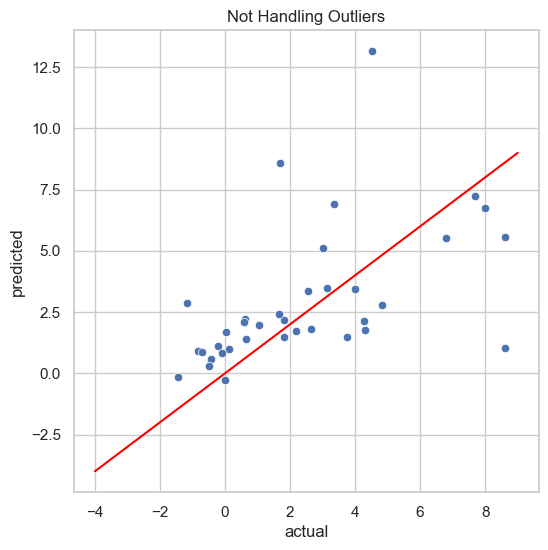

In [306]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=comparisons1,
                ax=ax
)
plt.plot([-4,9], [-4,9], c='red')
plt.title('Not Handling Outliers')
plt.savefig("images/regression/NotHandlingOutliers")
plt.show()

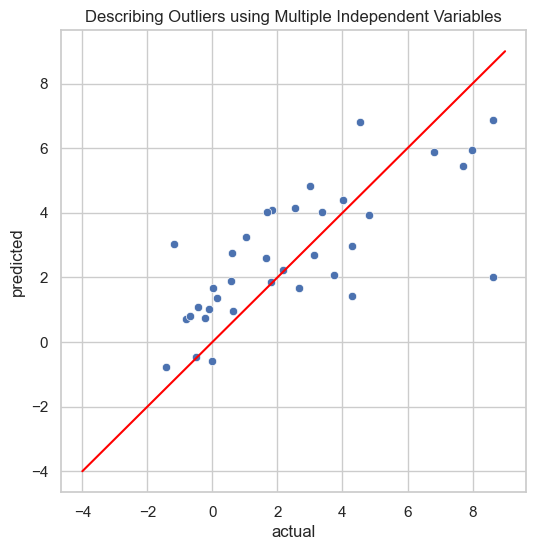

In [311]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=comparisons3,
                ax=ax
)
plt.plot([-4,9], [-4,9], c='red')
plt.title('Describing Outliers using Multiple Independent Variables')
plt.savefig("images/regression/MultipleDummyVariables")
plt.show()

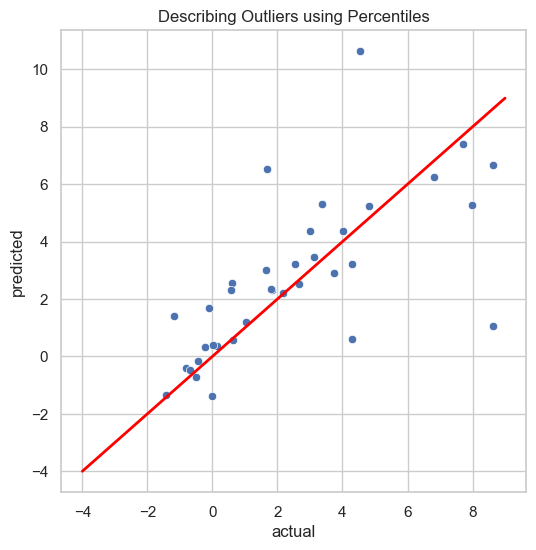

In [308]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=comparisons5,
                ax=ax
)
plt.plot([-4,9], [-4,9], c='red', linewidth=2)
plt.title('Describing Outliers using Percentiles')
plt.savefig("images/regression/UsingPercentiles")
plt.show()

The normality of residuals model assumption requires the residuals to be normally distributed. This is true for the first and third model but not the second.

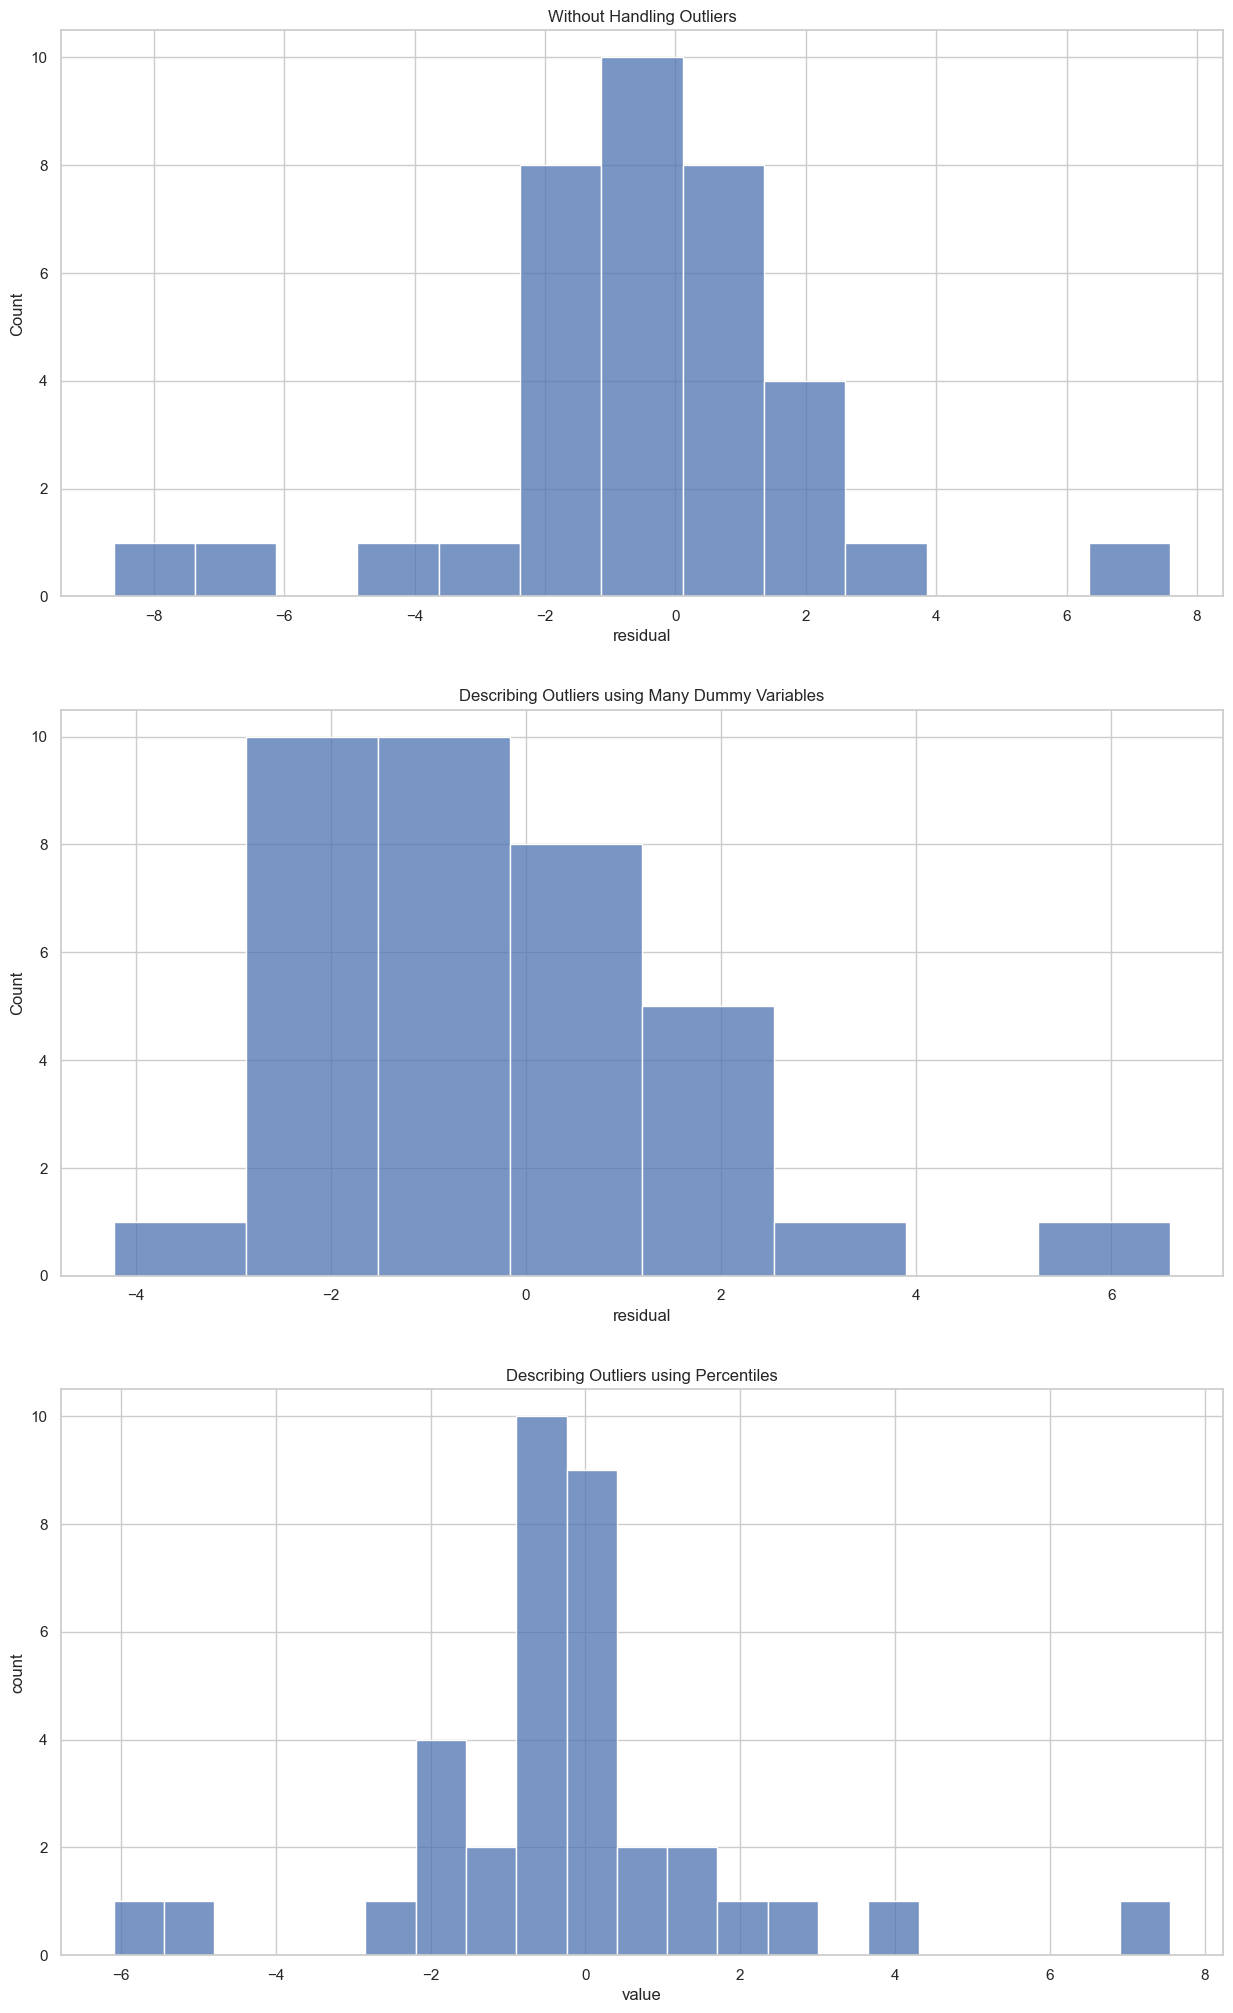

In [309]:
fig, axes = plt.subplots(nrows=3, figsize=(15,25))

sns.histplot(comparisons1['residual'], ax=axes[0])
sns.histplot(comparisons3['residual'], ax=axes[1])
sns.histplot(comparisons5['residual'], ax=axes[2])

axes[0].set_title("Without Handling Outliers")
axes[1].set_title("Describing Outliers using Many Dummy Variables")
axes[2].set_title("Describing Outliers using Percentiles")


# plt.title('Distribution of residuals')
plt.xlabel('value')
plt.ylabel('count');

There is also a constant variance assumption. This can be shown by graphing the residuals compared to the predicted value. Since the residuals are distributed roughly evenly for all three models the model assumption is met. 

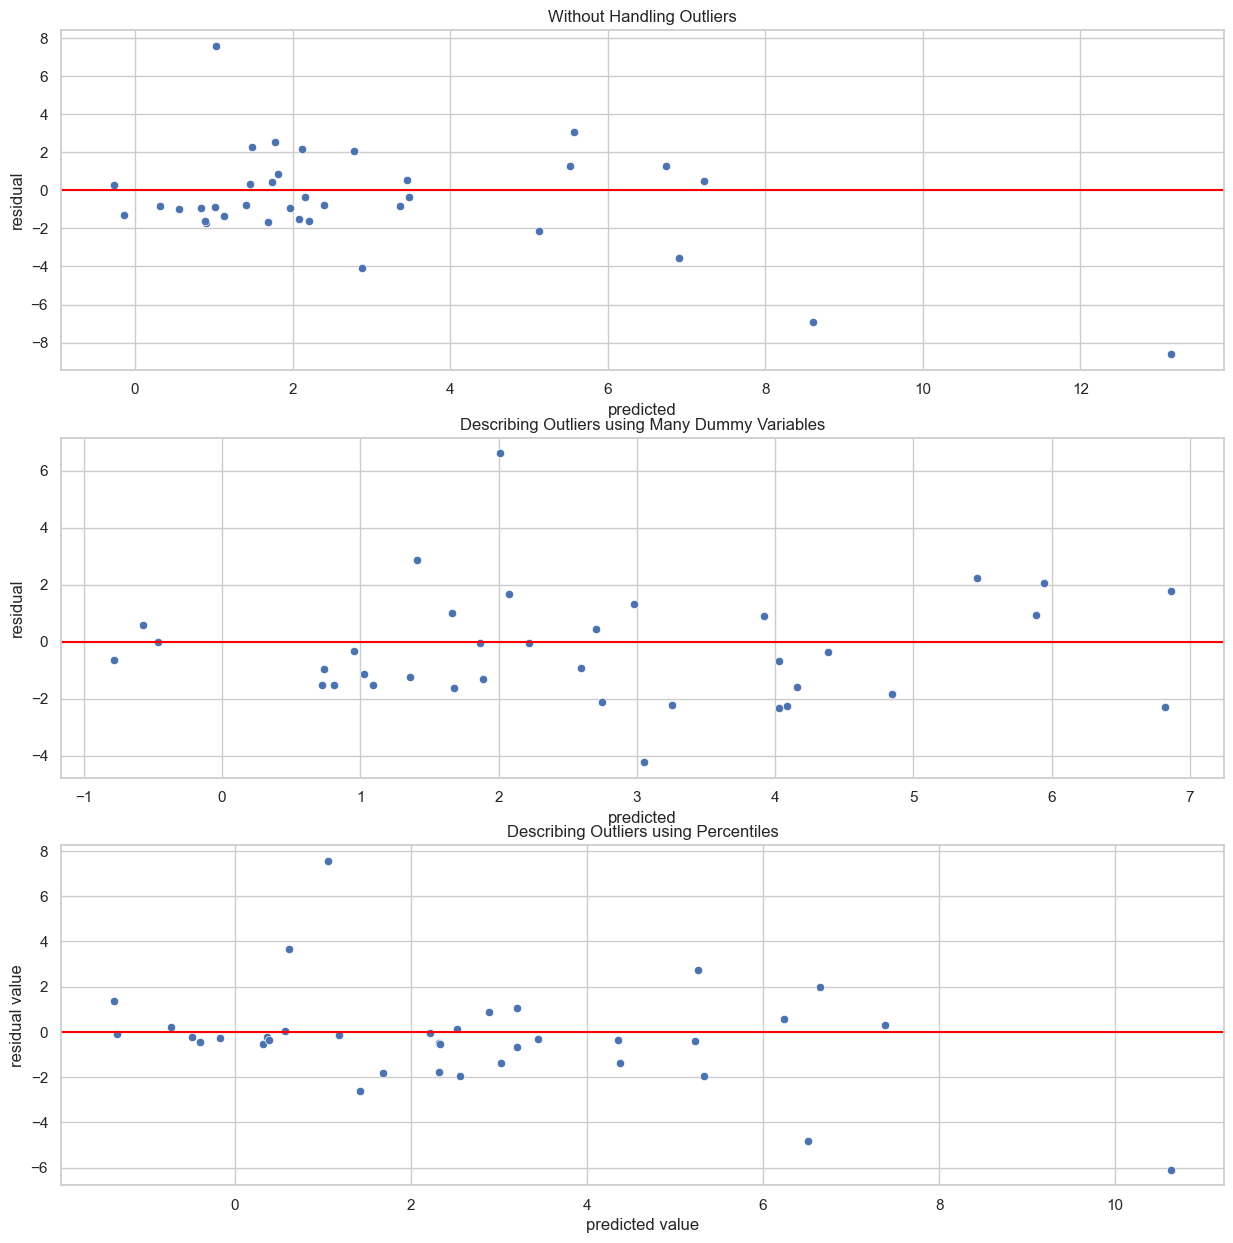

In [310]:
fig, axes = plt.subplots(nrows=3, figsize=(15,15))

sns.scatterplot(x='predicted', y='residual', data=comparisons1, ax=axes[0])
sns.scatterplot(x='predicted', y='residual', data=comparisons3, ax=axes[1])
sns.scatterplot(x='predicted', y='residual', data=comparisons5, ax=axes[2])


axes[0].axhline(0, c='red')
axes[1].axhline(0, c='red')
axes[2].axhline(0, c='red')

axes[0].set_title("Without Handling Outliers")
axes[1].set_title("Describing Outliers using Many Dummy Variables")
axes[2].set_title("Describing Outliers using Percentiles")


# plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()